# <center>Practice 03. Линейная регрессия</center>
## <center>Part 01. Двумерный случай</center>

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt

Допустим у нас есть небольшой набор данных, где х –– это количество людей в очереди, а y –– это сколько минут нам придётся в очереди прождать. Мы будем решать задачу регрессии, а именно будем предсказывать y по x.

In [2]:
data = """id,X,Y
1,3,8
2,18,34
3,17,46
4,24,60
5,7,19
6,19,31
7,8,11
8,10,19
9,20,45
10,6,7"""

In [3]:
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,X,Y
id,,
1,3,8
2,18,34
3,17,46
4,24,60
5,7,19
6,19,31
7,8,11
8,10,19
9,20,45


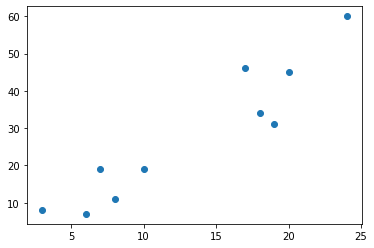

In [4]:
plt.scatter(data.X, data.Y);

Нашей модели линейной регрессии нужно просто выбрать "наилучшую" прямую, с помощью которой мы будем допускать как можно более мелкие ошибки на этих данных.

Уравнение прямой на плоскости y = kx + b, значит модель должна подобрать k и b.

Какая прямая наилучшая –– зависит от того, как мы будем считать ошибки предсказаний. Обычно тут используется функция ошибок MAE - среднеквадратичное отклонения от истинных предсказаний.

In [5]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [6]:
# будем обучатся на всех данных

X_train = pd.DataFrame(data.X) # нецелевой признак

In [7]:
y_train = pd.DataFrame(data.Y) # целевой признак, который будем предсказывать

In [8]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

Найдем коэффициент k и свободный член b.

In [9]:
# b
reg_model.intercept_

array([-3.29896907])

In [10]:
# k
reg_model.coef_

array([[2.37113402]])

Построим выбранную наилучшую прямую, а также отметим точки - объекты нашей выборки.

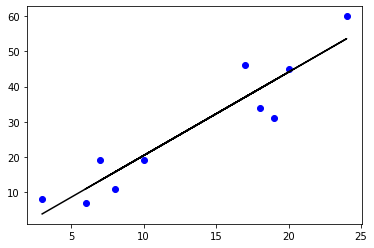

In [11]:
plt.scatter(data.X, data.Y, color="blue")
plt.plot(data.X, reg_model.predict(X_train), color="black")

plt.show()

Для оценки качества модели, посчитаем как мало ошибаемся и вычислим метрику $R^2$. В данном случае посчитаем просто на тренировочных данных.

In [12]:
y_predicted = reg_model.predict(X_train)
y_predicted

array([[ 3.81443299],
       [39.3814433 ],
       [37.01030928],
       [53.60824742],
       [13.29896907],
       [41.75257732],
       [15.67010309],
       [20.41237113],
       [44.12371134],
       [10.92783505]])

In [13]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predicted)

0.8802057695907487

Хорошее качество модели, так как $R^2$ близко к 1.